# Prediksi Perhitungan Lebar Gigi Seri Tengah Atas Dengan Regression
Author : Dwi Mustikasari (1402018219)


# Import Package 

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import pearsonr
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
!pip3 install catboost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


# Import Dataset From Google Drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratory Data Analysis (EDA)





In [3]:
df=pd.read_csv('/content/drive/MyDrive/Dataset2/Facial measurements New.csv')
df.head(10)

,photo number,ICW,IAW,MCW,LCW,IPW,CW,SEX
0,2,5.34,3.740,3.32,8.88,6.29,0.88,F
1,4,4.75,3.380,2.92,7.99,5.77,0.79,F
2,5,4.52,3.225,2.85,7.60,5.47,0.75,F
3,9,4.76,3.540,3.11,8.30,5.95,0.82,F
4,10,5.15,3.380,3.25,8.51,6.20,0.85,F
5,11,5.25,3.740,3.18,8.76,6.34,0.87,F
6,12,5.12,3.590,3.18,8.67,6.17,0.85,F
7,13,5.55,3.780,3.46,9.27,6.64,0.92,F
8,14,4.97,3.460,3.10,8.42,6.01,0.83,F
9,15,5.08,3.620,3.16,8.54,6.18,0.85,F


## Data Visualizations

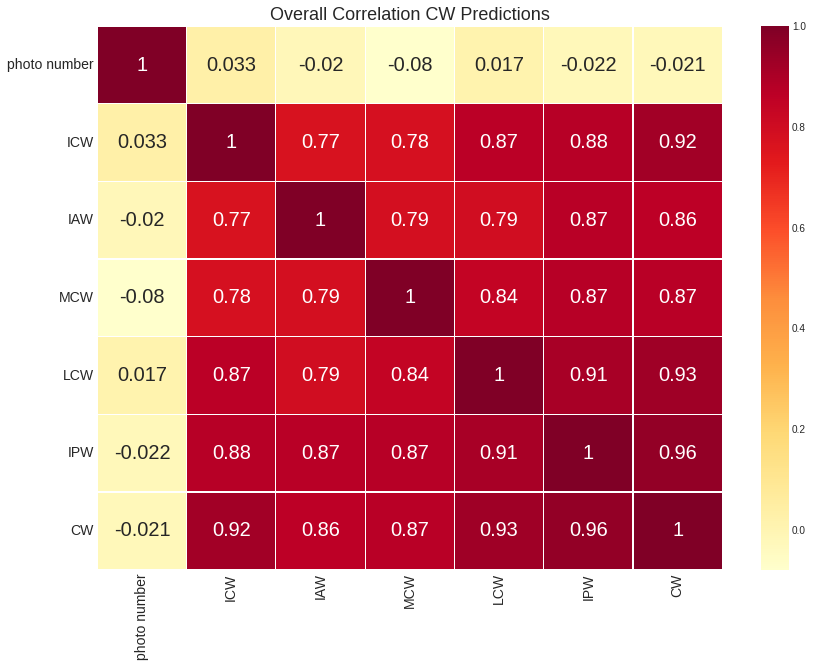

In [4]:
plt.style.use('seaborn-white')
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='YlOrRd',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.title("Overall Correlation CW Predictions", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

     jumlah sampel  persentase
SEX                           
M               86        50.9
F               83        49.1


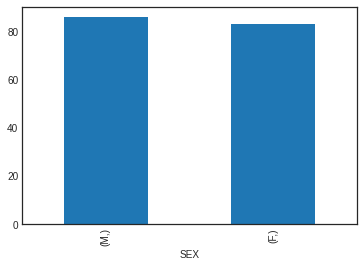

In [5]:
feature = ['SEX']
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar');

## Data Preparations


In [6]:
df = df.drop(columns='SEX')
df = df.drop(columns='photo number')

In [7]:
df.head()

,ICW,IAW,MCW,LCW,IPW,CW
0,5.34,3.740,3.32,8.88,6.29,0.88
1,4.75,3.380,2.92,7.99,5.77,0.79
2,4.52,3.225,2.85,7.60,5.47,0.75
3,4.76,3.540,3.11,8.30,5.95,0.82
4,5.15,3.380,3.25,8.51,6.20,0.85


In [8]:
X = df[df.columns[:-1]]
y = np.array(df['CW'])

In [9]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)

In [10]:
X

array([[0.64864865, 0.56716418, 0.64583333, 0.62195122, 0.56818182],
       [0.25      , 0.29850746, 0.22916667, 0.2601626 , 0.27272727],
       [0.09459459, 0.18283582, 0.15625   , 0.10162602, 0.10227273],
       [0.25675676, 0.41791045, 0.42708333, 0.38617886, 0.375     ],
       [0.52027027, 0.29850746, 0.57291667, 0.47154472, 0.51704545],
       [0.58783784, 0.56716418, 0.5       , 0.57317073, 0.59659091],
       [0.5       , 0.45522388, 0.5       , 0.53658537, 0.5       ],
       [0.79054054, 0.59701493, 0.79166667, 0.7804878 , 0.76704545],
       [0.39864865, 0.35820896, 0.41666667, 0.43495935, 0.40909091],
       [0.47297297, 0.47761194, 0.47916667, 0.48373984, 0.50568182],
       [0.62837838, 0.6641791 , 0.59375   , 0.61382114, 0.625     ],
       [0.46621622, 0.5       , 0.44791667, 0.46341463, 0.47727273],
       [0.14189189, 0.23880597, 0.15625   , 0.11788618, 0.11931818],
       [0.26351351, 0.3880597 , 0.36458333, 0.24390244, 0.19886364],
       [0.4527027 , 0.46268657, 0.

## Split Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=60)

In [12]:
len(X_train)

135

In [13]:
len(X_test)

34

In [14]:
len(y_test)

34

# Modeling

## CatBoost Regressor

In [15]:
from sklearn.linear_model import LogisticRegression
model = CatBoostRegressor()

In [16]:
model.fit(X_train,y_train)

Learning rate set to 0.029838
0:	learn: 0.0502193	total: 46.6ms	remaining: 46.6s
1:	learn: 0.0491800	total: 47.6ms	remaining: 23.8s
2:	learn: 0.0481245	total: 48.5ms	remaining: 16.1s
3:	learn: 0.0471676	total: 49.3ms	remaining: 12.3s
4:	learn: 0.0461855	total: 50ms	remaining: 9.96s
5:	learn: 0.0452151	total: 50.8ms	remaining: 8.42s
6:	learn: 0.0442605	total: 51.6ms	remaining: 7.32s
7:	learn: 0.0433804	total: 52.4ms	remaining: 6.49s
8:	learn: 0.0425249	total: 53.2ms	remaining: 5.85s
9:	learn: 0.0416429	total: 54ms	remaining: 5.34s
10:	learn: 0.0407797	total: 54.7ms	remaining: 4.92s
11:	learn: 0.0399724	total: 55.5ms	remaining: 4.57s
12:	learn: 0.0391574	total: 56.4ms	remaining: 4.29s
13:	learn: 0.0383535	total: 57.3ms	remaining: 4.04s
14:	learn: 0.0376059	total: 58.3ms	remaining: 3.83s
15:	learn: 0.0368129	total: 59.1ms	remaining: 3.63s
16:	learn: 0.0360535	total: 59.9ms	remaining: 3.46s
17:	learn: 0.0353184	total: 60.7ms	remaining: 3.31s
18:	learn: 0.0346075	total: 61.7ms	remaining: 3.

Means Absolute Error (MAE) = 0.007996971832460705
Root Means Squared Error (RMSE) = 0.010443183299093904
Pearsonr Correlations Coefficient = 0.9763527402986107


Text(0.5, 1.0, 'CatBoost Regression')

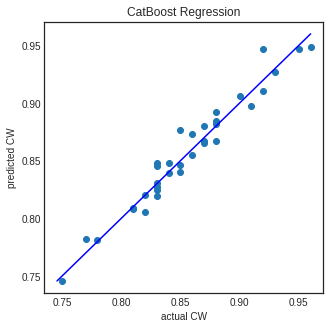

In [17]:
y_pred = model.predict(X_test)
mse_cb1 = mean_squared_error(y_pred,y_test)
mae_cb1 = mean_absolute_error(y_pred,y_test)
rmse_cb1 = np.sqrt(mse_cb1)
r_cb1, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_cb1))
print("Root Means Squared Error (RMSE) = " + str(rmse_cb1))
print("Pearsonr Correlations Coefficient = " + str(r_cb1))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("CatBoost Regression")

In [18]:
y_pred = np.array(y_pred)

In [19]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by CatBoost Regressor:")
print("\t\tCW Predicted:  ", np.round(model.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

Prediction made by CatBoost Regressor:
		CW Predicted:   0.86583
		Actual Widht:   0.87


## Linear Regression

In [20]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

Means Absolute Error (MAE) = 0.006251641664939493
Root Means Squared Error (RMSE) = 0.008172381202777652
Pearsonr Correlations Coefficient = 0.9857379644037595


Text(0.5, 1.0, 'Linear Regression')

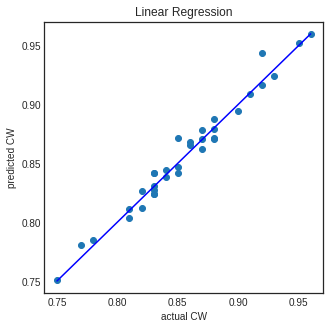

In [21]:
y_pred = model1.predict(X_test)
mse_lr1 = mean_squared_error(y_pred,y_test)
mae_lr1 = mean_absolute_error(y_pred,y_test)
rmse_lr1 = np.sqrt(mse_lr1)
r_lr1, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_lr1))
print("Root Means Squared Error (RMSE) = " + str(rmse_lr1))
print("Pearsonr Correlations Coefficient = " + str(r_lr1))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Linear Regression")

In [22]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by Linear Regression:")
print("\t\tCW Predicted:  ", np.round(model.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

Prediction made by Linear Regression:
		CW Predicted:   0.83109
		Actual Widht:   0.83


## XGB Regression

In [23]:
model2 = XGBRegressor()
model2.fit(X_train, y_train)

[11:48:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Means Absolute Error (MAE) = 0.0077480988642748645
Root Means Squared Error (RMSE) = 0.010655733429426556
Pearsonr Correlations Coefficient = 0.9753012999726713


Text(0.5, 1.0, 'XGBoost Regression')

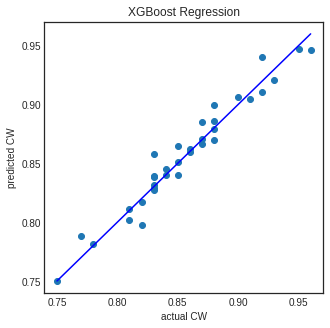

In [24]:
y_pred = model2.predict(X_test)
mae_xgb1 = mean_absolute_error(y_pred,y_test)
mse_xgb1 = mean_squared_error(y_pred,y_test)
rmse_xgb1 = np.sqrt(mse_xgb1)
r_xgb1, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_xgb1))
print("Root Means Squared Error (RMSE) = " + str(rmse_xgb1))
print("Pearsonr Correlations Coefficient = " + str(r_xgb1))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("XGBoost Regression")

In [25]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by XGB Regressor:")
print("\t\tCW Predicted:  ", np.round(model2.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

Prediction made by XGB Regressor:
		CW Predicted:   0.87935
		Actual Widht:   0.88


## Decision Tree *Regression*

In [26]:
model3 = DecisionTreeRegressor(random_state=60)
model3.fit(X_train, y_train)

DecisionTreeRegressor(random_state=60)

Means Absolute Error (MAE) = 0.007941176470588236
Root Means Squared Error (RMSE) = 0.011757350641945104
Pearsonr Correlations Coefficient = 0.973234869920282


Text(0.5, 1.0, 'Decison Tree Regression')

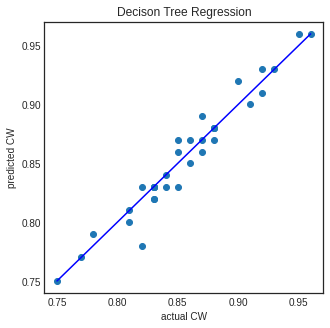

In [27]:
y_pred = model3.predict(X_test)
mse_dt1 = mean_squared_error(y_pred,y_test)
mae_dt1 = mean_absolute_error(y_pred,y_test)
rmse_dt1 = np.sqrt(mse_dt1)
r_dt1, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_dt1))
print("Root Means Squared Error (RMSE) = " + str(rmse_dt1))
print("Pearsonr Correlations Coefficient = " + str(r_dt1))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Decison Tree Regression")

In [28]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by Decision Tree Regressor:")
print("\t\tCW Predicted:  ", np.round(model3.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

Prediction made by Decision Tree Regressor:
		CW Predicted:   0.88
		Actual Widht:   0.88


## Random Forest Regression

In [29]:
from sklearn import model_selection
model4 = RandomForestRegressor(random_state=60)
    
model4.fit(X_train, y_train)

RandomForestRegressor(random_state=60)

Means Absolute Error (MAE) = 0.0067382352941175614
Root Means Squared Error (RMSE) = 0.009321717211152901
Pearsonr Correlations Coefficient = 0.9809702483122342


Text(0.5, 1.0, 'Random Forest Regression')

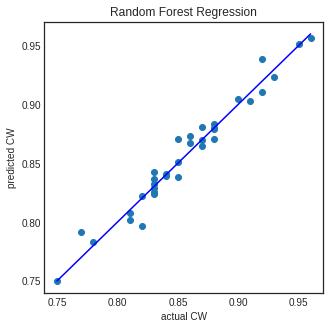

In [30]:
y_pred = model4.predict(X_test)
mse_rf1 = mean_squared_error(y_pred,y_test)
mae_rf1 = mean_absolute_error(y_pred,y_test)
rmse_rf1 = np.sqrt(mse_rf1)
r_rf1, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_rf1))
print("Root Means Squared Error (RMSE) = " + str(rmse_rf1))
print("Pearsonr Correlations Coefficient = " + str(r_rf1))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Random Forest Regression")

In [31]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by Random Forest Regressor:")
print("\t\tCW Predicted:  ", np.round(model4.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

Prediction made by Random Forest Regressor:
		CW Predicted:   0.883
		Actual Widht:   0.88


## KNeighbors Regressor

In [32]:
model6 =KNeighborsRegressor()
model6.fit(X_train, y_train)

KNeighborsRegressor()

Means Absolute Error (MAE) = 0.00876470588235293
Root Means Squared Error (RMSE) = 0.010226838968817174
Pearsonr Correlations Coefficient = 0.9770461100081791


Text(0.5, 1.0, 'KNeighbors Regression')

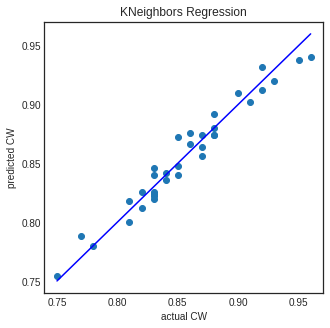

In [33]:
y_pred = model6.predict(X_test)
mse_kn1 = mean_squared_error(y_pred,y_test)
mae_kn1 = mean_absolute_error(y_pred,y_test)
rmse_kn1 = np.sqrt(mse_kn1)
r_kn1, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_kn1))
print("Root Means Squared Error (RMSE) = " + str(rmse_kn1))
print("Pearsonr Correlations Coefficient = " + str(r_kn1))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("KNeighbors Regression")

In [34]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by KNeighbors Regressor:")
print("\t\tCW Predicted:  ", np.round(model6.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

Prediction made by KNeighbors Regressor:
		CW Predicted:   0.892
		Actual Widht:   0.88


## Ridge Regression

In [35]:
model7 = Ridge()
model7.fit(X_train, y_train)

Ridge()

Means Absolute Error (MAE) = 0.006872358120420759
Root Means Squared Error (RMSE) = 0.008563094362071835
Pearsonr Correlations Coefficient = 0.9839040924006996


Text(0.5, 1.0, 'Ridge Regression')

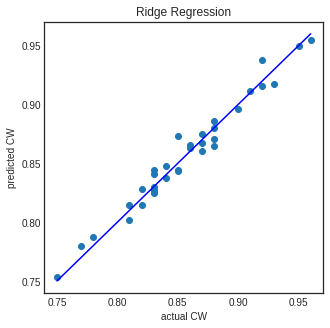

In [36]:
y_pred = model7.predict(X_test)
mse_rg1 = mean_squared_error(y_pred,y_test)
mae_rg1 = mean_absolute_error(y_pred,y_test)
rmse_rg1 = np.sqrt(mse_rg1)
r_rg1, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_rg1))
print("Root Means Squared Error (RMSE) = " + str(rmse_rg1))
print("Pearsonr Correlations Coefficient = " + str(r_rg1))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Ridge Regression")

In [37]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by KNeighbors Regressor:")
print("\t\tCW Predicted:  ", np.round(model7.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

Prediction made by KNeighbors Regressor:
		CW Predicted:   0.86766
		Actual Widht:   0.87


# EVALUASI

In [38]:
tbl1 = pd.DataFrame({'Algoritma': ['CatBoost', 'Linear Regression', 'XGB Regression', 'Decision Tree','Random Forest Regression','KNeighbors Regressor', 'Ridge Regression'],
                   'RMSE': [rmse_cb1, rmse_lr1, rmse_xgb1, rmse_dt1, rmse_rf1 , rmse_kn1, rmse_rg1],
                   'MAE': [mae_cb1, mae_lr1, mae_xgb1, mae_dt1, mae_rf1 , mae_kn1, mae_rg1],
                   'r corr': [r_cb1, r_lr1, r_xgb1, r_dt1, r_rf1 , r_kn1, r_rg1]})
blankIndex2=[''] * len(tbl1)
tbl1.index=blankIndex2
tbl1

,Algoritma,RMSE,MAE,r corr
,CatBoost,0.010443,0.007997,0.976353
,Linear Regression,0.008172,0.006252,0.985738
,XGB Regression,0.010656,0.007748,0.975301
,Decision Tree,0.011757,0.007941,0.973235
,Random Forest Regression,0.009322,0.006738,0.980970
,KNeighbors Regressor,0.010227,0.008765,0.977046
,Ridge Regression,0.008563,0.006872,0.983904


# Modeling hyperparameter tuning 

## CatBoost Regressor

In [39]:
model8 = CatBoostRegressor()

In [40]:
parameters = {'depth'         : [1,2,3,4,5,6,7, 8,10],
              'learning_rate' : [0.1, 0.2, 0.3,1,2,3,4],
              'iterations'    : [ 50, 100, 200, 300]}

model8 = GridSearchCV(estimator=model8, param_grid = parameters, cv = 2, n_jobs=-1)

model8.fit(X_train,y_train)
model8.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:978: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


0:	learn: 0.0480612	total: 701us	remaining: 210ms
1:	learn: 0.0447785	total: 1.91ms	remaining: 285ms
2:	learn: 0.0415347	total: 2.71ms	remaining: 268ms
3:	learn: 0.0388168	total: 3.6ms	remaining: 266ms
4:	learn: 0.0362201	total: 4.52ms	remaining: 266ms
5:	learn: 0.0336963	total: 5.41ms	remaining: 265ms
6:	learn: 0.0314118	total: 6.98ms	remaining: 292ms
7:	learn: 0.0294400	total: 7.8ms	remaining: 285ms
8:	learn: 0.0277004	total: 9.59ms	remaining: 310ms
9:	learn: 0.0260359	total: 10.6ms	remaining: 309ms
10:	learn: 0.0243742	total: 11.4ms	remaining: 301ms
11:	learn: 0.0230642	total: 12.3ms	remaining: 294ms
12:	learn: 0.0217420	total: 13.2ms	remaining: 291ms
13:	learn: 0.0205018	total: 14ms	remaining: 285ms
14:	learn: 0.0193739	total: 14.7ms	remaining: 280ms
15:	learn: 0.0183004	total: 15.5ms	remaining: 275ms
16:	learn: 0.0173344	total: 16.3ms	remaining: 272ms
17:	learn: 0.0164718	total: 17.1ms	remaining: 269ms
18:	learn: 0.0157086	total: 18ms	remaining: 266ms
19:	learn: 0.0149551	total: 1

{'depth': 6, 'iterations': 300, 'learning_rate': 0.1}

Means Absolute Error (MAE) = 0.007914762986913718
Root Means Squared Error (RMSE) = 0.009861183429809486
Pearsonr Correlations Coefficient = 0.9787719567960361


Text(0.5, 1.0, 'Catboost Regression With GridSearchCV')

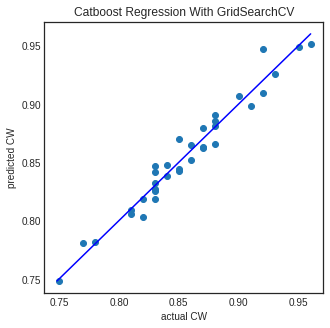

In [41]:
y_pred = model8.predict(X_test)
mse_cb2 = mean_squared_error(y_pred,y_test)
mae_cb2 = mean_absolute_error(y_pred,y_test)
rmse_cb2 = np.sqrt(mse_cb2)
r_cb2, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_cb2))
print("Root Means Squared Error (RMSE) = " + str(rmse_cb2))
print("Pearsonr Correlations Coefficient = " + str(r_cb2))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Catboost Regression With GridSearchCV")

In [42]:
y_pred = np.array(y_pred)

In [43]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by CatBoost Regressor:")
print("\t\tCW Predicted:  ", np.round(model8.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

Prediction made by CatBoost Regressor:
		CW Predicted:   0.88085
		Actual Widht:   0.88


## Linear Regression

In [44]:
model9 = LinearRegression()

In [45]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False], 'positive':[True,False], 'n_jobs':[200, 300, 1000]}
model9 = GridSearchCV(model9,parameters, cv=2)
model9.fit(X_train, y_train)
model9.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 200,
 'normalize': True,
 'positive': True}

Means Absolute Error (MAE) = 0.006251641664939489
Root Means Squared Error (RMSE) = 0.008172381202777652
Pearsonr Correlations Coefficient = 0.9857379644037596


Text(0.5, 1.0, 'Linear Regression With GridSearchCV')

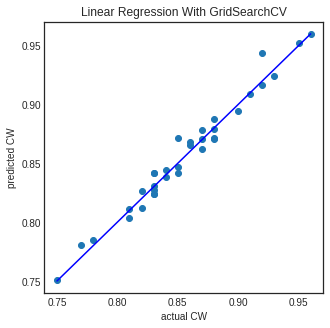

In [46]:
y_pred = model9.predict(X_test)
mse_lr2 = mean_squared_error(y_pred,y_test)
mae_lr2 = mean_absolute_error(y_pred,y_test)
rmse_lr2 = np.sqrt(mse_lr2)
r_lr2, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_lr2))
print("Root Means Squared Error (RMSE) = " + str(rmse_lr2))
print("Pearsonr Correlations Coefficient = " + str(r_lr2))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Linear Regression With GridSearchCV")

In [47]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by Linear Regression:")
print("\t\tCW Predicted:  ", np.round(model9.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

Prediction made by Linear Regression:
		CW Predicted:   0.83095
		Actual Widht:   0.83


## XGB Regression

In [48]:
model10 = XGBRegressor()


In [49]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06, 0.07, 0.08, 0.09], #so called `eta` value
             }
model10 = GridSearchCV(model10,parameters, cv=None)
model10.fit(X_train, y_train)
model10.best_params_

[11:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:50:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'learning_rate': 0.08}

Means Absolute Error (MAE) = 0.007561916533638446
Root Means Squared Error (RMSE) = 0.00991023037739094
Pearsonr Correlations Coefficient = 0.9783917032108135


Text(0.5, 1.0, 'XGboost Regression With GridSearchCV')

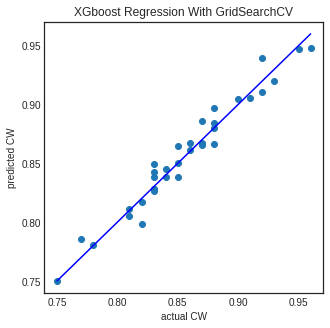

In [50]:
y_pred = model10.predict(X_test)
mse_xgb2 = mean_squared_error(y_pred,y_test)
mae_xgb2 = mean_absolute_error(y_pred,y_test)
rmse_xgb2 = np.sqrt(mse_xgb2)
r_xgb2, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_xgb2))
print("Root Means Squared Error (RMSE) = " + str(rmse_xgb2))
print("Pearsonr Correlations Coefficient = " + str(r_xgb2))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("XGboost Regression With GridSearchCV")

In [51]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by XGB Regressor:")
print("\t\tCW Predicted:  ", np.round(model10.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

Prediction made by XGB Regressor:
		CW Predicted:   0.86535
		Actual Widht:   0.87


## Decision Tree *Regression*

In [52]:
model11 = DecisionTreeRegressor()


In [53]:
param_grid = {"splitter":["best","random"],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10], 
           "random_state" : [ 8,16, 32, 42],
           "max_depth":[1000, 100, 20, 19, 18,17,15],'max_leaf_nodes':[1000, 100, 20, 19, 18],'min_samples_leaf':[1, 2, 3, 4,5], "max_features":["auto", "sqrt", "log2"]}
           
model11 = GridSearchCV(model11, param_grid, cv=3, scoring='f1_macro')

model11.fit(X_train,y_train)
model11.best_params_

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1270, in fbeta_score
    zer

{'max_depth': 1000,
 'max_features': 'auto',
 'max_leaf_nodes': 1000,
 'min_samples_leaf': 1,
 'random_state': 8,
 'splitter': 'best'}

Means Absolute Error (MAE) = 0.0067647058823529305
Root Means Squared Error (RMSE) = 0.010710083209431231
Pearsonr Correlations Coefficient = 0.979360285013185


Text(0.5, 1.0, 'Decision Tree Regression With GridSearchCV')

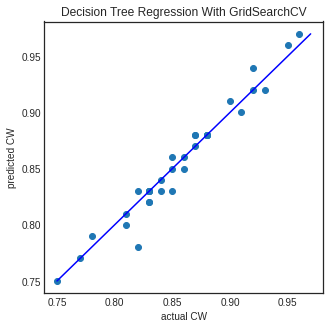

In [54]:
y_pred = model11.predict(X_test)
mse_dt2 = mean_squared_error(y_pred,y_test)
mae_dt2 = mean_absolute_error(y_pred,y_test)
rmse_dt2 = np.sqrt(mse_dt2)
print("Means Absolute Error (MAE) = " + str(mae_dt2))
print("Root Means Squared Error (RMSE) = " + str(rmse_dt2))
r_dt2, _ =  pearsonr(y_test, y_pred)
print("Pearsonr Correlations Coefficient = " + str(r_dt2))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Decision Tree Regression With GridSearchCV")

In [55]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by Decision Tree Regressor:")
print("\t\tCW Predicted:  ", np.round(model11.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

Prediction made by Decision Tree Regressor:
		CW Predicted:   0.88
		Actual Widht:   0.87


## Random Forest Regression

In [56]:
model12 = RandomForestRegressor()


In [57]:
param_grid = { 'max_depth' : [ 6, 7, 8, 10, 100, 1000], 'n_estimators':[10,100],
               'oob_score':[True,False], 'random_state':[8, 16, 42]}
model12 = GridSearchCV(model12, param_grid, n_jobs=100, cv=5, scoring='f1_macro')

model12.fit(X_train,y_train)
model12.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


{'max_depth': 6, 'n_estimators': 10, 'oob_score': True, 'random_state': 8}

Means Absolute Error (MAE) = 0.00626472468323678
Root Means Squared Error (RMSE) = 0.00865033198035821
Pearsonr Correlations Coefficient = 0.9834595938295894


Text(0.5, 1.0, 'Random Forest Regression With GridSearchCV')

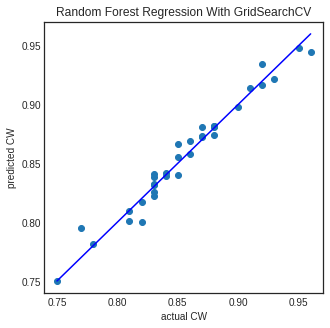

In [58]:
y_pred = model12.predict(X_test)
mse_rf2 = mean_squared_error(y_pred,y_test)
mae_rf2 = mean_absolute_error(y_pred,y_test)
rmse_rf2 = np.sqrt(mse_rf2)
r_rf2, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_rf2))
print("Root Means Squared Error (RMSE) = " + str(rmse_rf2))
print("Pearsonr Correlations Coefficient = " + str(r_rf2))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Random Forest Regression With GridSearchCV")

In [59]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by Random Forest Regressor:")
print("\t\tCW Predicted:  ", np.round(model12.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

Prediction made by Random Forest Regressor:
		CW Predicted:   0.84158
		Actual Widht:   0.84


## KNeighbors Regressor

In [60]:
model13 = KNeighborsRegressor()


In [61]:
param_grid = {'n_neighbors': [ 3, 2, 1],'p':[2, 3, 4, 5], "weights":['uniform', 'distance']}
model13 = GridSearchCV(model13, param_grid,cv=3, scoring='f1_macro')

model13.fit(X_train,y_train)
model13.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1270, in fbeta_score
    zero_division=zero_division,
  File "/usr/local/lib/py

{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

Means Absolute Error (MAE) = 0.007450980392156875
Root Means Squared Error (RMSE) = 0.008929645126851543
Pearsonr Correlations Coefficient = 0.9822511479265389


Text(0.5, 1.0, 'KNeighbors Regression With GridSearchCV')

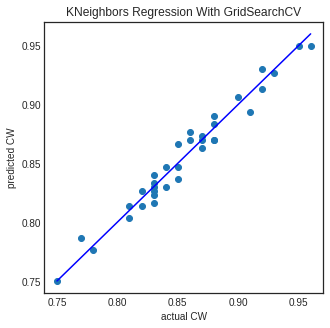

In [62]:
y_pred = model13.predict(X_test)
mse_kn2 = mean_squared_error(y_pred,y_test)
mae_kn2 = mean_absolute_error(y_pred,y_test)
rmse_kn2 = np.sqrt(mse_kn2)
r_kn2, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_kn2))
print("Root Means Squared Error (RMSE) = " + str(rmse_kn2))
print("Pearsonr Correlations Coefficient = " + str(r_kn2))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("KNeighbors Regression With GridSearchCV")

In [63]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by KNeighbors Regressor:")
print("\t\tCW Predicted:  ", np.round(model13.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

Prediction made by KNeighbors Regressor:
		CW Predicted:   0.86333
		Actual Widht:   0.87


## Ridge Regression

In [64]:
model14 = Ridge()

In [65]:
param_grid = {'alpha':[0.01, 0.1, 0.2, 0.3],"fit_intercept":[True,False], 'random_state':[42, 16], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}  
model14 = GridSearchCV(model14, param_grid,n_jobs=-1, scoring='f1_macro')

model14.fit(X_train,y_train)
model14.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  category=UserWarning,


{'alpha': 0.01, 'fit_intercept': True, 'random_state': 42, 'solver': 'svd'}

Means Absolute Error (MAE) = 0.00625547399528672
Root Means Squared Error (RMSE) = 0.008173786540591955
Pearsonr Correlations Coefficient = 0.9857232212741648


Text(0.5, 1.0, 'Ridge Regression With GridSearchCV')

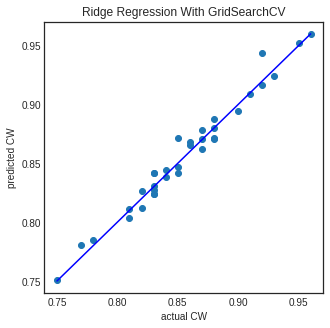

In [66]:
y_pred = model14.predict(X_test)
mse_rg2 = mean_squared_error(y_pred,y_test)
mae_rg2 = mean_absolute_error(y_pred,y_test)
rmse_rg2 = np.sqrt(mse_rg2)
r_rg2, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_rg2))
print("Root Means Squared Error (RMSE) = " + str(rmse_rg2))
print("Pearsonr Correlations Coefficient = " + str(r_rg2))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Ridge Regression With GridSearchCV")

In [67]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by KNeighbors Regressor:")
print("\t\tCW Predicted:  ", np.round(model14.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

Prediction made by KNeighbors Regressor:
		CW Predicted:   0.84433
		Actual Widht:   0.84


#EVALUASI


In [68]:
tbl2 = pd.DataFrame({'Algoritma': ['CatBoost', 'Linear Regression', 'XGB Regression', 'Decision Tree','Random Forest Regression','KNeighbors Regressor', 'Ridge Regression'],
                    'RMSE BEFORE': [rmse_cb1, rmse_lr1, rmse_xgb1, rmse_dt1,rmse_rf1 , rmse_kn1, rmse_rg1],
                   'RMSE': [rmse_cb2, rmse_lr2, rmse_xgb2, rmse_dt2,rmse_rf2 , rmse_kn2, rmse_rg2],
                    'MAE BEFORE': [mae_cb1, mae_lr1, mae_xgb1, mae_dt1, mae_rf1 , mae_kn1, mae_rg1],
                   'MAE': [mae_cb2, mae_lr2, mae_xgb2, mae_dt2, mae_rf2 , mae_kn2, mae_rg2],
                   'r corr BEFORE': [r_cb1, r_lr1, r_xgb1, r_dt1, r_rf1 , r_kn1, r_rg1],
                   'r corr': [r_cb2, r_lr2, r_xgb2, r_dt2, r_rf2 , r_kn2, r_rg2]})
blankIndex2=[''] * len(tbl2)
tbl2.index=blankIndex2
tbl2


,Algoritma,RMSE BEFORE,RMSE,MAE BEFORE,MAE,r corr BEFORE,r corr
,CatBoost,0.010443,0.009861,0.007997,0.007915,0.976353,0.978772
,Linear Regression,0.008172,0.008172,0.006252,0.006252,0.985738,0.985738
,XGB Regression,0.010656,0.009910,0.007748,0.007562,0.975301,0.978392
,Decision Tree,0.011757,0.010710,0.007941,0.006765,0.973235,0.979360
,Random Forest Regression,0.009322,0.008650,0.006738,0.006265,0.980970,0.983460
,KNeighbors Regressor,0.010227,0.008930,0.008765,0.007451,0.977046,0.982251
,Ridge Regression,0.008563,0.008174,0.006872,0.006255,0.983904,0.985723


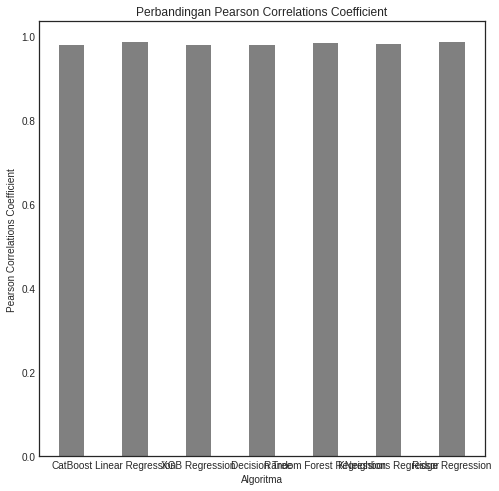

In [69]:
# creating the dataset

fig = plt.figure(figsize = (8, 8))
 
# creating the bar plot
plt.bar(tbl2['Algoritma'], tbl2['r corr'], color ='grey',
        width = 0.4)
 
plt.xlabel("Algoritma")
plt.ylabel("Pearson Correlations Coefficient")
plt.title("Perbandingan Pearson Correlations Coefficient")
plt.show()

https://colab.research.google.com/drive/1eWMtxh-DS3QVUoN5U6oiuhReWRPM0WRx?usp=sharing >>> system with Gender
